In [75]:
!pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 12.2MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


### Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. This notebook is an attempt to explore the data to get insight into the patterns 

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Notebook Formatting

In [3]:
pd.options.display.float_format='{:,.2f}'.format

In [4]:
df=pd.read_csv("/content/drive/MyDrive/udemy-101/Nobel+Prize+Analysis+Complete/nobel_prize_data.csv")

### EDA and Cleaning

In [5]:
#Shape of the dataset
df.shape

(962, 16)

In [6]:
df.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [7]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [8]:
df.dtypes

year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
birth_country_current    object
sex                      object
organization_name        object
organization_city        object
organization_country     object
ISO                      object
dtype: object

In [9]:
#check for nan
df.isnull().any(axis=0)

year                     False
category                 False
prize                    False
motivation                True
prize_share              False
laureate_type            False
full_name                False
birth_date                True
birth_city                True
birth_country             True
birth_country_current     True
sex                       True
organization_name         True
organization_city         True
organization_country      True
ISO                       True
dtype: bool

In [10]:
df.isnull().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [11]:
df.duplicated().sum()


0

In [12]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [13]:
#Finding 
cols_set=['year', 'category', 'prize', 
       'laureate_type', 'full_name', 'birth_date',  'organization_name']
   

In [14]:
df.loc[df.birth_date.isna()][cols_set]

,year,category,prize,laureate_type,full_name,birth_date,organization_name
24,1904,Peace,The Nobel Peace Prize 1904,Organization,Institut de droit international (Institute of ...,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN
200,1938,Peace,The Nobel Peace Prize 1938,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN
237,1947,Peace,The Nobel Peace Prize 1947,Organization,American Friends Service Committee (The Quakers),NaN,NaN
238,1947,Peace,The Nobel Peace Prize 1947,Organization,Friends Service Council (The Quakers),NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,Organization,Office of the United Nations High Commissioner...,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN
349,1963,Peace,The Nobel Peace Prize 1963,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN


birth_date is null for the laureate_type	Organization

In [15]:
df.loc[df.organization_name.isna()][cols_set]

,year,category,prize,laureate_type,full_name,birth_date,organization_name
1,1901,Literature,The Nobel Prize in Literature 1901,Individual,Sully Prudhomme,1839-03-16,NaN
3,1901,Peace,The Nobel Peace Prize 1901,Individual,Frédéric Passy,1822-05-20,NaN
4,1901,Peace,The Nobel Peace Prize 1901,Individual,Jean Henry Dunant,1828-05-08,NaN
7,1902,Literature,The Nobel Prize in Literature 1902,Individual,Christian Matthias Theodor Mommsen,1817-11-30,NaN
9,1902,Peace,The Nobel Peace Prize 1902,Individual,Charles Albert Gobat,1843-05-21,NaN
...,...,...,...,...,...,...,...
932,2018,Peace,The Nobel Peace Prize 2018,Individual,Nadia Murad,1993-07-02,NaN
942,2019,Literature,The Nobel Prize in Literature 2019,Individual,Peter Handke,1942-12-06,NaN
946,2019,Peace,The Nobel Peace Prize 2019,Individual,Abiy Ahmed Ali,1976-08-15,NaN
954,2020,Literature,The Nobel Prize in Literature 2020,Individual,Louise Glück,1943-04-22,NaN


organisation name is nan for individual and few organization also

In [16]:
df['birth_date']=pd.to_datetime(df['birth_date'])

In [17]:
df['birth_date'].head(2)

0   1852-08-30
1   1839-03-16
Name: birth_date, dtype: datetime64[ns]

In [18]:
split_prize_share=df['prize_share'].str.split('/',expand=True)
NR=pd.to_numeric(split_prize_share[0])
DR=pd.to_numeric(split_prize_share[1])
df['share_pct']=NR/DR


### Analyse Prize Categories & Women Winning Prizes

In [19]:
winners_FandM=df['sex'].value_counts()
winners_FandM

Male      876
Female     58
Name: sex, dtype: int64

In [20]:
#Plot percentage of Male Vs Female winners
fig=px.pie(winners_FandM,names=winners_FandM.index,values=winners_FandM.values,labels=winners_FandM.index,title="Male Vs Female Winners",hole=0.5)
fig.update_traces(textposition='inside', textfont_size=14,textinfo='percent')
fig.show()

### Male and Female Winners by Category

In [21]:
cat_M_F=df.groupby(['category','sex'],as_index=False).agg({'prize':pd.Series.count})
cat_M_F.sort_values('prize',ascending=False,inplace=True)
cat_M_F

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [22]:
bar_vstack=px.bar(x=cat_M_F.category,y=cat_M_F.prize,color=cat_M_F.sex,title='No of Prizes as per Men and Women Category')
bar_vstack.update_layout(xaxis_title='Nobel Prize Cateogry',yaxis_title='# Prize')
bar_vstack.show()

### No. of Prizes awareded over time

In [23]:
prize_per_year= df.groupby('year').count().prize

In [24]:
moving_avg=prize_per_year.rolling(window=5).mean()

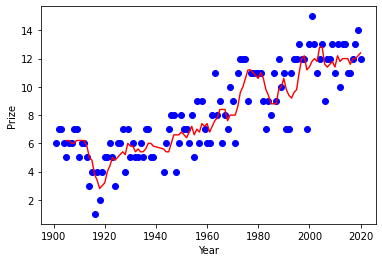

In [25]:
plt.scatter(x=prize_per_year.index,y=prize_per_year.values,color='blue')
plt.plot(prize_per_year.index,moving_avg.values,color='red',linewidth=1.4)
plt.xlabel("Year")
plt.ylabel("Prize")
plt.show()

In [26]:
yearly_avg_share = df.groupby(by='year').agg({'share_pct': pd.Series.mean})
share_moving_average = yearly_avg_share.rolling(window=5).mean()

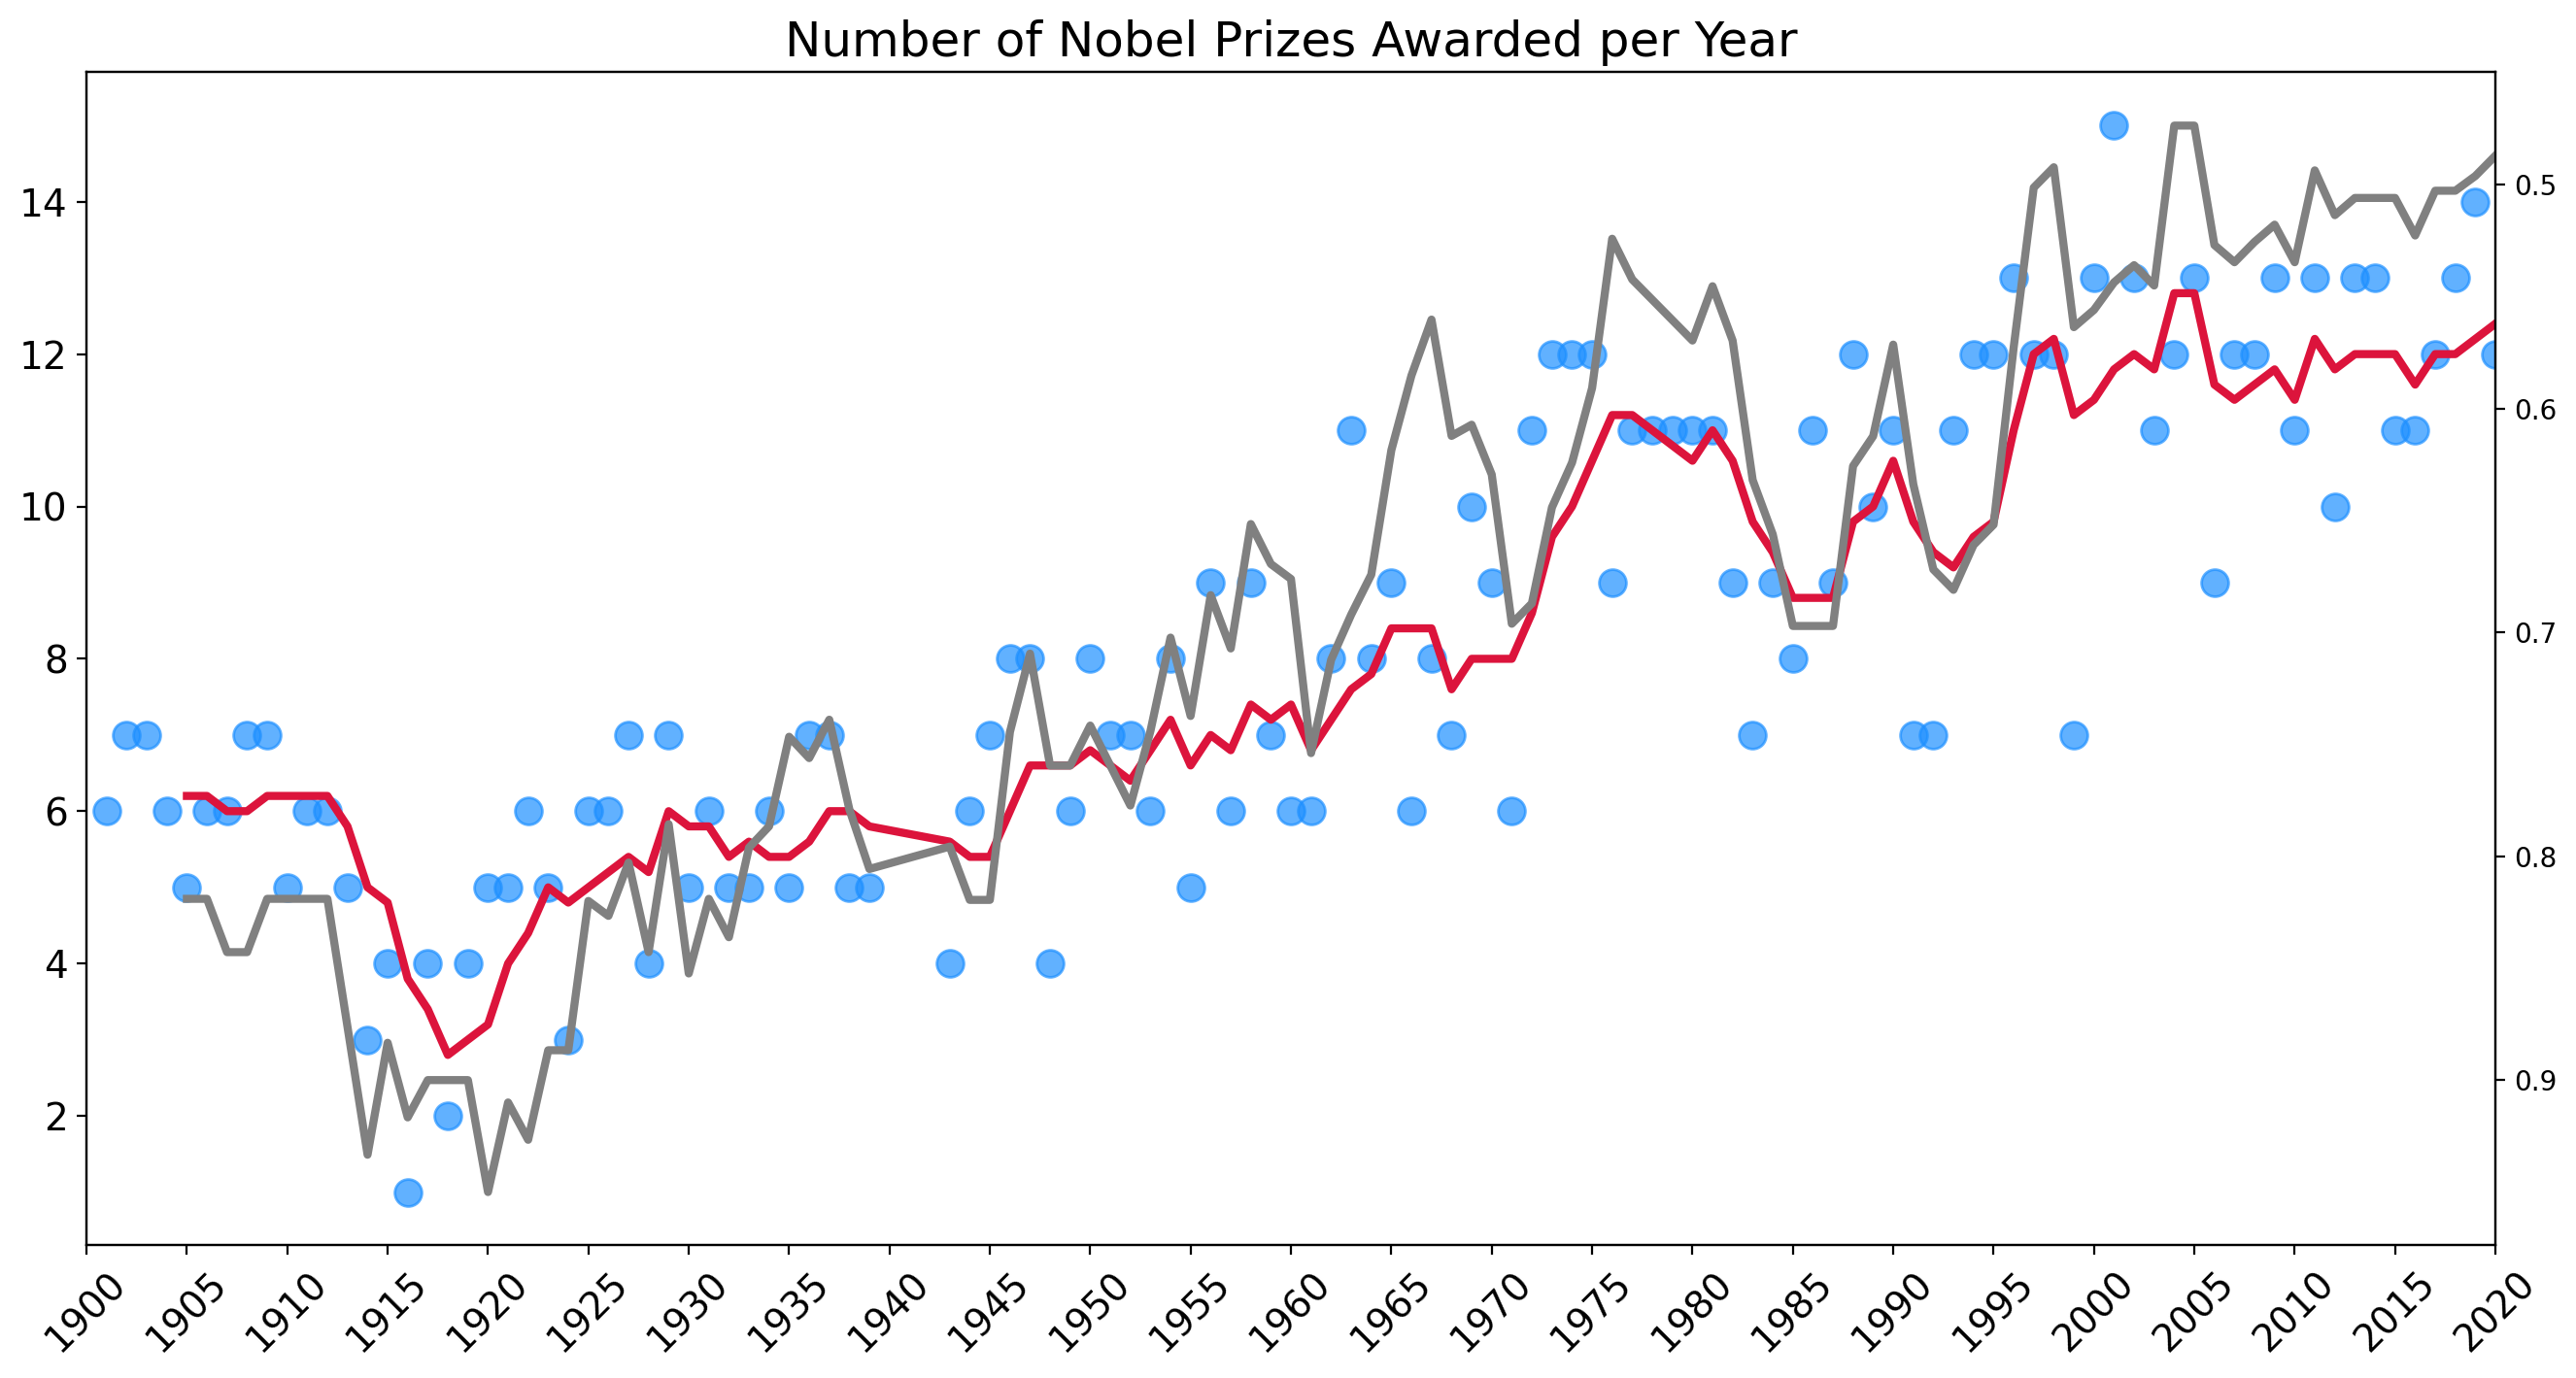

In [27]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)

# Can invert axis
ax2.invert_yaxis()

ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax1.plot(prize_per_year.index, 
        moving_avg.values, 
        c='crimson', 
        linewidth=3,)

ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)

plt.show()

### Top Countries by Prize

In [38]:
top_countries=df.groupby(['birth_country_current'],as_index=False).agg({'prize':pd.Series.count})
top_countries.sort_values('prize',inplace=True)
top_20_countries=top_countries[-20:]
top_20_countries


,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [35]:
top_countries.columns

Index(['prize'], dtype='object')

In [39]:
bar_h=px.bar(x=top_20_countries.prize,
             y=top_20_countries.birth_country_current,
             color=top_20_countries.prize,
             orientation='h')
bar_h.update_layout(xaxis_title="Prize",
                    yaxis_title="Countries",
                    )

### No of Prize won by Country


In [40]:
df_countries=df.groupby(['birth_country_current','ISO'],as_index=False).agg({'prize':pd.Series.count})
df_countries

,birth_country_current,ISO,prize
0,Algeria,DZA,2
1,Argentina,ARG,4
2,Australia,AUS,10
3,Austria,AUT,18
4,Azerbaijan,AZE,1
...,...,...,...
74,United States of America,USA,281
75,Venezuela,VEN,1
76,Vietnam,VNM,1
77,Yemen,YEM,1


In [42]:
countries_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.matter)

countries_map.update_layout(coloraxis_showscale=True,)

countries_map.show()

### Categories in which Different Countries Winning Prizes

In [43]:
cat_country = df.groupby(['birth_country_current', 'category'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)
cat_country

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [45]:
merged_df = pd.merge(cat_country, top_20_countries, on='birth_country_current')
# change column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 
merged_df.sort_values(by='total_prize', inplace=True)
merged_df

,birth_country_current,category,cat_prize,total_prize
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


In [46]:
cat_cntry_bar = px.bar(x=merged_df.cat_prize,
                       y=merged_df.birth_country_current,
                       color=merged_df.category,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')

cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')
cat_cntry_bar.show()

### Cumulative number of prizes won by each country over time

In [47]:
prize_by_year = df.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1
...,...,...,...
31,2019,Austria,1
221,2020,Germany,1
622,2020,United States of America,7
533,2020,United Kingdom,2


In [48]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)

In [49]:
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')

l_chart.show()

### What are the Top Research Organizations

In [50]:
top20_orgs = df.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)
org_bar = px.bar(x = top20_orgs.values,
                 y = top20_orgs.index,
                 orientation='h',
                 color=top20_orgs.values,
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Top 20 Research Institutions by Number of Prizes')

org_bar.update_layout(xaxis_title='Number of Prizes', 
                      yaxis_title='Institution',
                      coloraxis_showscale=False)
org_bar.show()

### Top Cities with most research

In [51]:
top20_org_cities = df.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)
city_bar2 = px.bar(x = top20_org_cities.values,
                  y = top20_org_cities.index,
                  orientation='h',
                  color=top20_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Which Cities Do the Most Research?')

city_bar2.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City',
                       coloraxis_showscale=False)
city_bar2.show()

### Combine Country, City and Organisation using Plotly Sunburst Chart

In [52]:
country_city_org = df.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})

country_city_org = country_city_org.sort_values('prize', ascending=False)
country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [53]:
cols=["organization_country", "organization_city", "organization_name"]

In [54]:
burst = px.sunburst(country_city_org, 
                  path=cols,
                    values='prize',
                    title='Where do Discoveries Take Place?'
                   )

burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=True)

burst.show()

### Patterns in the Laureate Age at the Time of the Award

In [56]:
df['winning_age'] = df.year - df.birth_date.dt.year
df.winning_age

0     49.00
1     62.00
2     47.00
3     79.00
4     73.00
       ... 
957   71.00
958     nan
959   55.00
960   68.00
961   89.00
Name: winning_age, Length: 962, dtype: float64

In [57]:
display(df.nlargest(n=1, columns='winning_age'))
display(df.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


In [58]:
df.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

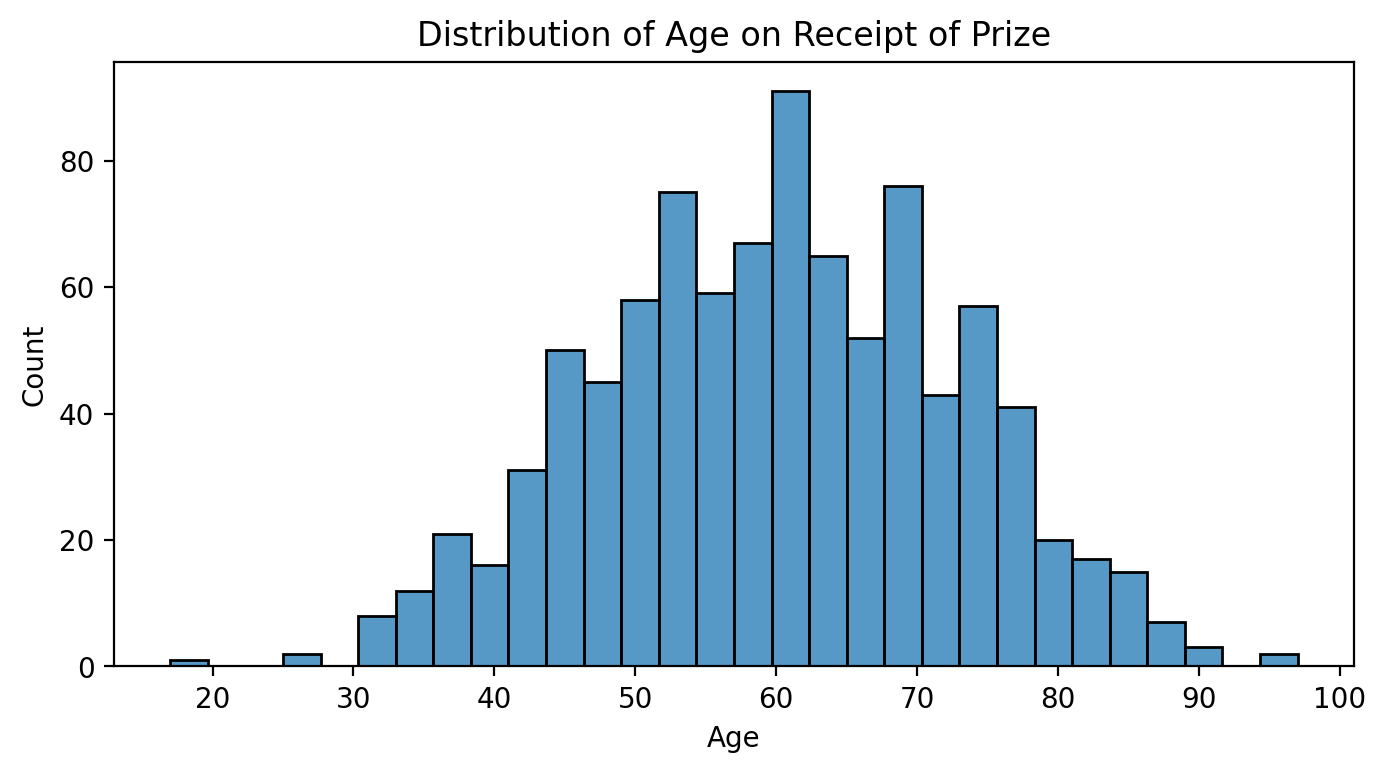

In [59]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df,
             x=df.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

Age at the Time of Award throughout History

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



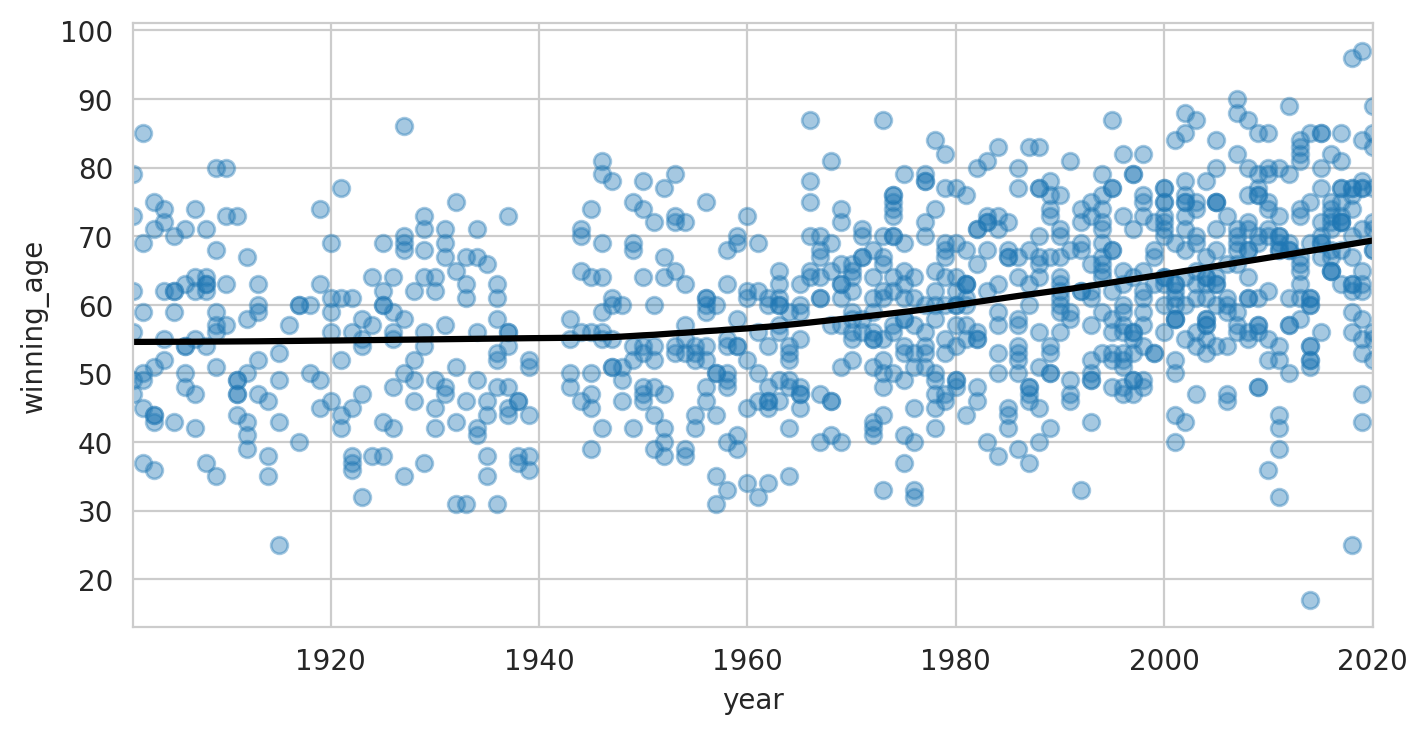

In [60]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})

plt.show()

Winning Age Across Prize Category

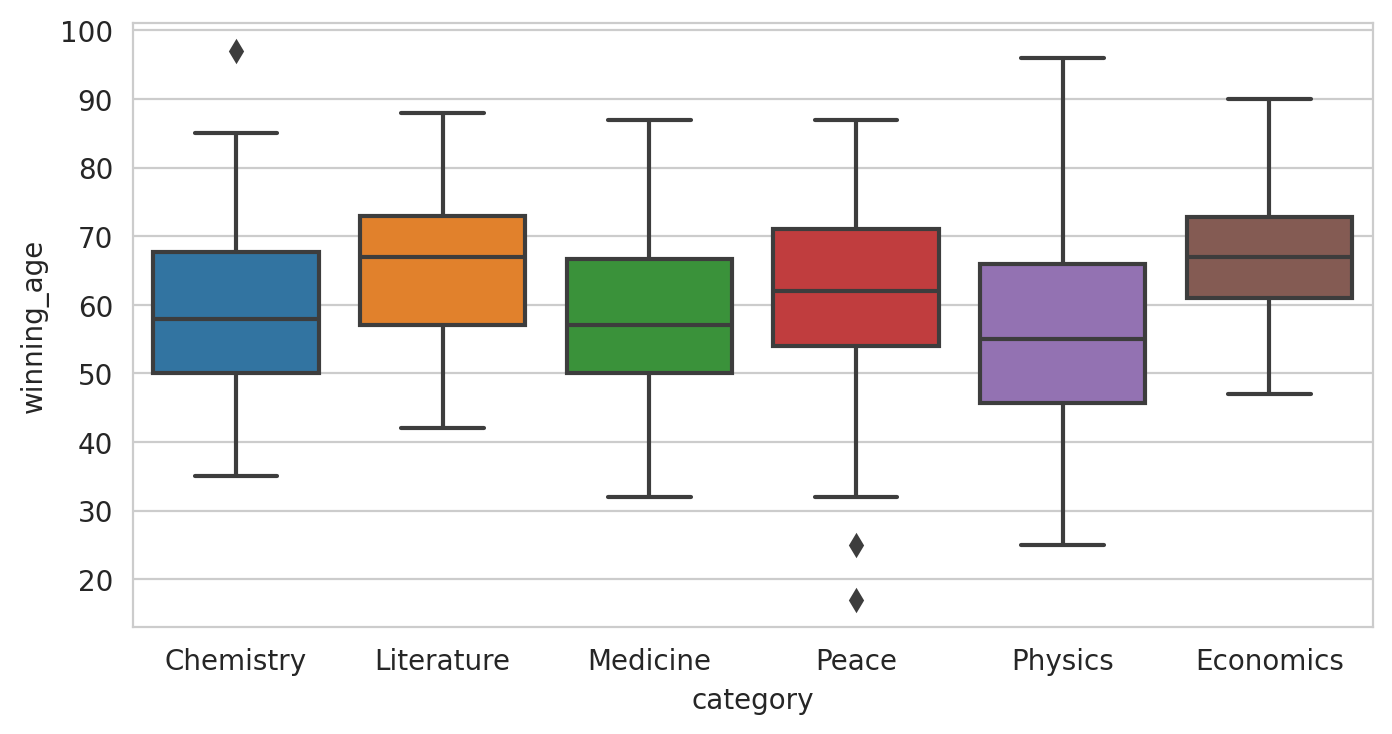

In [62]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df,
                x='category',
                y='winning_age')

plt.show()

Winning Trend in each category

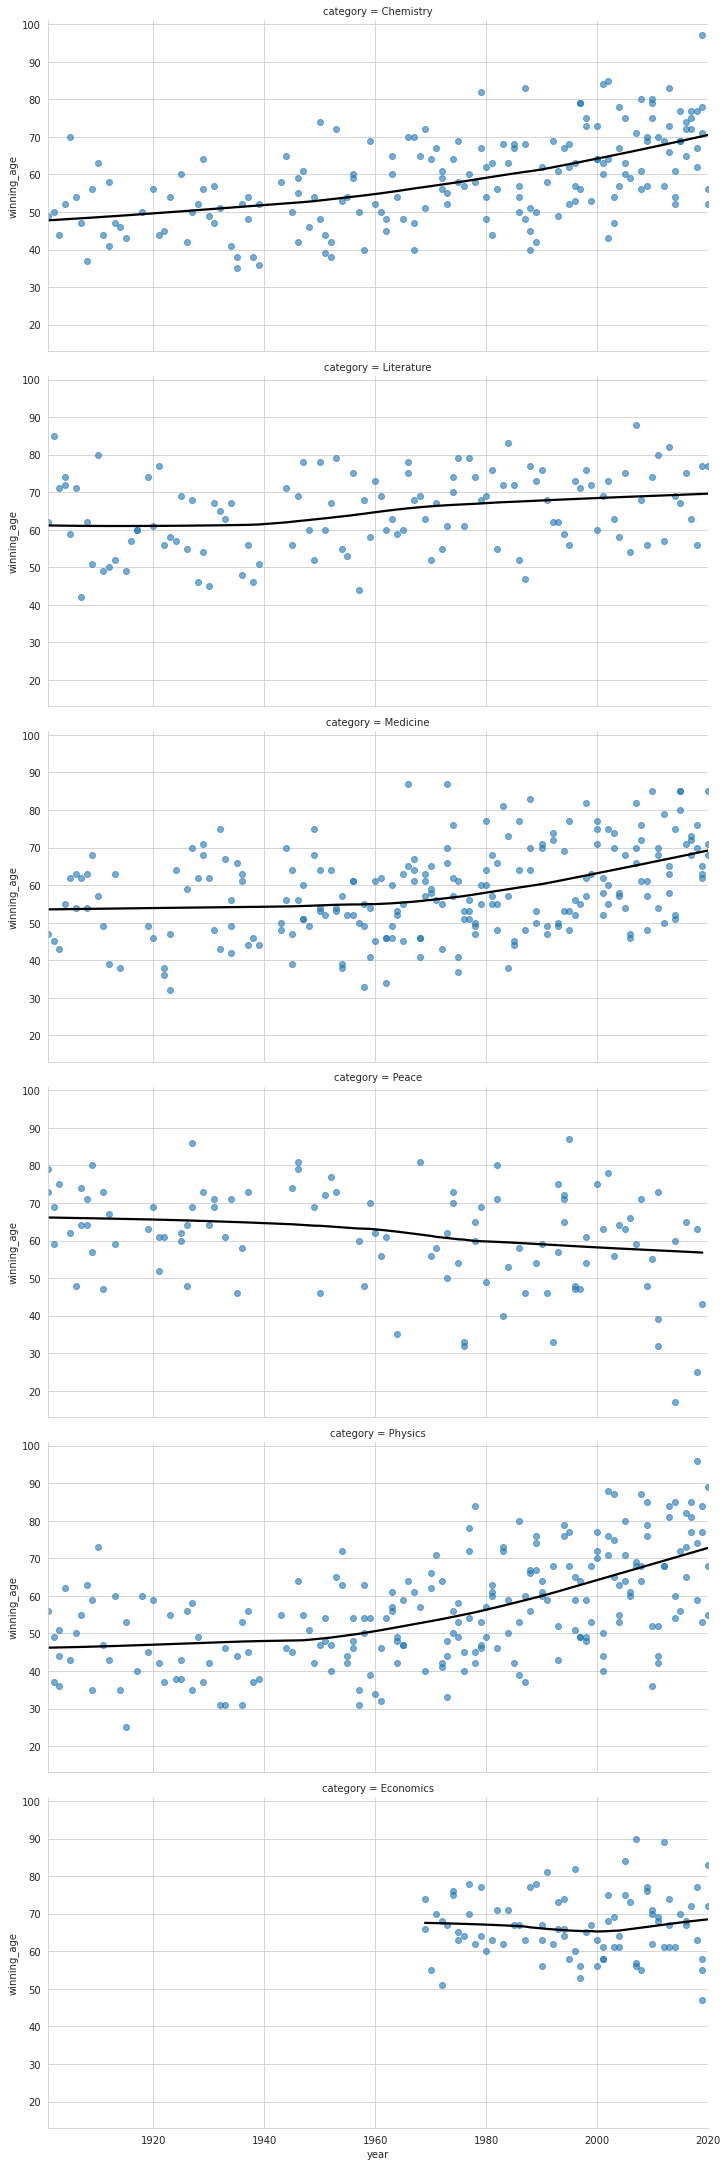

In [63]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)

plt.show()

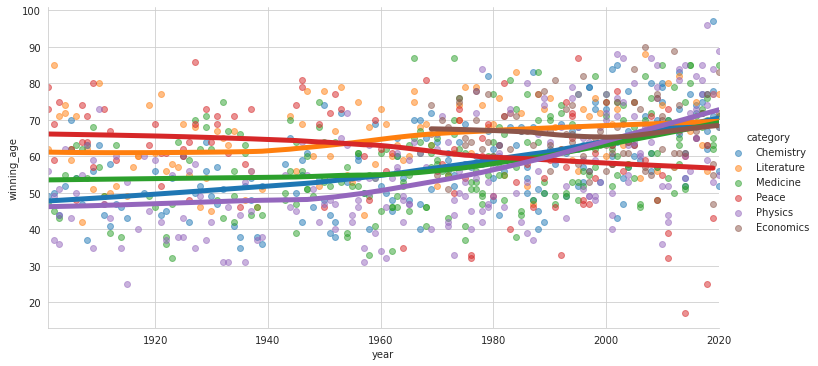

In [65]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})

plt.show()